In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

<ipython-input-4-7ffc1f1d448d>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
def parser(x):
 return datetime.strptime('20'+x, '%Y-%m')
 

In [ ]:
series = read_csv('/content/drive/MyDrive/data/data_2.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.head()

,Amount,population,Number of days in this month
Date,,,
2016-01-01,33731,"20,917,456",31
2016-02-01,33552,"20,926,884",29
2016-03-01,32722,"20,936,313",31
2016-04-01,28248,"20,945,742",30
2016-05-01,35907,"20,955,170",31


In [ ]:
series.tail()

,Amount,population,Number of days in this month
Date,,,
2021-08-01,30803,NaN,31
2021-09-01,37380,NaN,30
2021-10-01,31810,NaN,31
2021-11-01,33670,NaN,30
2021-12-01,34082,NaN,31


**Visualize the Data**

In [ ]:

series.head()

,Amount,population,Number of days in this month
Date,,,
2016-01-01,33731,"20,917,456",31
2016-02-01,33552,"20,926,884",29
2016-03-01,32722,"20,936,313",31
2016-04-01,28248,"20,945,742",30
2016-05-01,35907,"20,955,170",31


<AxesSubplot:xlabel='Date'>

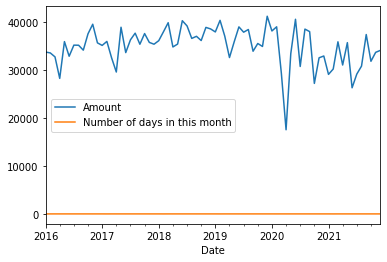

In [ ]:
series.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(amount):
  result = adfuller(amount)
  labels = ['ADF Test Statistic','P-Value','#Lags Used','Number of Observations Used']
  for value,label in zip(result, labels):
    print(label + ' : '+str(value))
  if result[1]<=0.05:
    print("Strong evidence against the null hypothesis , reject the null hypothesis. Data has not unit root and is stationary")
  else:
    print("Week evidence aginst null hypothesis, time series has a unit root, indicating it is non-stationary")

In [ ]:
print(series.columns.tolist())
adfuller_test(series["Amount"])

['Amount', 'population', 'Number of days in this month']
ADF Test Statistic : -1.7921375298854931
P-Value : 0.38437211946008126
#Lags Used : 5
Number of Observations Used : 66
Week evidence aginst null hypothesis, time series has a unit root, indicating it is non-stationary


**Differencing**

In [ ]:
series['Amount first Defferences'] =series['Amount'] - series['Amount'].shift(1)
series['Amount'].shift(1)
series.head(14)

,Amount,population,Number of days in this month,Amount first Defferences
Date,,,,
2016-01-01,33731,"20,917,456",31,NaN
2016-02-01,33552,"20,926,884",29,-179.0
2016-03-01,32722,"20,936,313",31,-830.0
2016-04-01,28248,"20,945,742",30,-4474.0
2016-05-01,35907,"20,955,170",31,7659.0
2016-06-01,32860,"20,964,599",30,-3047.0
2016-07-01,35172,"20,974,028",31,2312.0
2016-08-01,35153,"20,983,456",31,-19.0
2016-09-01,34125,"20,992,885",30,-1028.0


In [ ]:
series['Seasonal first Defferences'] =series['Amount'] - series['Amount'].shift(12)
series.head(14)


,Amount,population,Number of days in this month,Amount first Defferences,Seasonal first Defferences
Date,,,,,
2016-01-01,33731,"20,917,456",31,NaN,NaN
2016-02-01,33552,"20,926,884",29,-179.0,NaN
2016-03-01,32722,"20,936,313",31,-830.0,NaN
2016-04-01,28248,"20,945,742",30,-4474.0,NaN
2016-05-01,35907,"20,955,170",31,7659.0,NaN
2016-06-01,32860,"20,964,599",30,-3047.0,NaN
2016-07-01,35172,"20,974,028",31,2312.0,NaN
2016-08-01,35153,"20,983,456",31,-19.0,NaN
2016-09-01,34125,"20,992,885",30,-1028.0,NaN


In [ ]:
series['Seasonal first Defferences 1'] =series['Seasonal first Defferences'] - series['Seasonal first Defferences'].shift(12)
series.head(26)

,Amount,population,Number of days in this month,Amount first Defferences,Seasonal first Defferences,Seasonal first Defferences 1
Date,,,,,,
2016-01-01,33731,"20,917,456",31,NaN,NaN,NaN
2016-02-01,33552,"20,926,884",29,-179.0,NaN,NaN
2016-03-01,32722,"20,936,313",31,-830.0,NaN,NaN
2016-04-01,28248,"20,945,742",30,-4474.0,NaN,NaN
2016-05-01,35907,"20,955,170",31,7659.0,NaN,NaN
2016-06-01,32860,"20,964,599",30,-3047.0,NaN,NaN
2016-07-01,35172,"20,974,028",31,2312.0,NaN,NaN
2016-08-01,35153,"20,983,456",31,-19.0,NaN,NaN
2016-09-01,34125,"20,992,885",30,-1028.0,NaN,NaN


In [ ]:
#agin test dickey fuller test
adfuller_test(series["Seasonal first Defferences 1"].dropna())

ADF Test Statistic : -4.424398215245906
P-Value : 0.00026867132033497394
#Lags Used : 3
Number of Observations Used : 44
Strong evidence against the null hypothesis , reject the null hypothesis. Data has not unit root and is stationary


<AxesSubplot:xlabel='Date'>

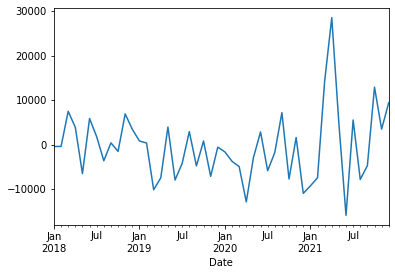

In [ ]:
series["Seasonal first Defferences 1"].dropna().plot()

## **Auto Regressive Model**


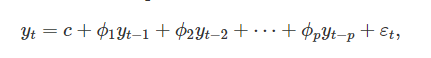



## Final Thoughts on Autocorrelation and Partial Autocorrelation
* Identification of an AR model is often best done with the PACF.

    For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

* Identification of an MA model is often best done with the ACF rather than the PACF.

    For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags





In [ ]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

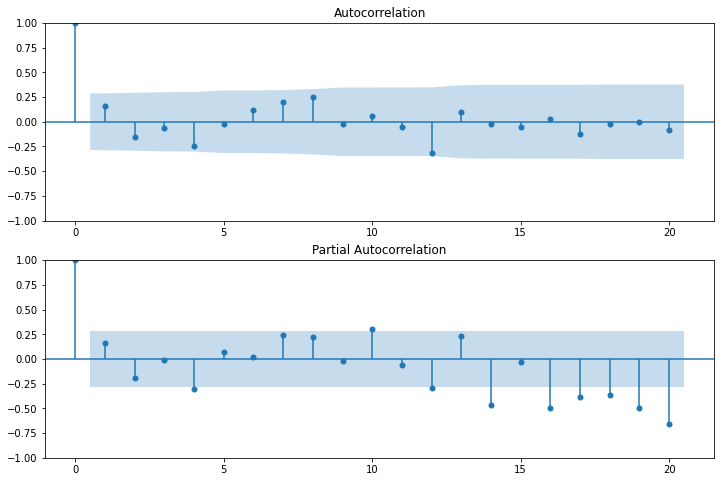

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series['Seasonal first Defferences 1'].iloc[25:],lags=20,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series["Seasonal first Defferences 1"].iloc[25:],lags=20,ax = ax2)

In [ ]:
# p = 1, d=2, q = 0 or 1
 

In [ ]:
# fit model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(series["Amount"], order=(1,2,1))
model_fit = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
import statsmodels.api as sm


In [ ]:
from statsmodels.tsa import statespace
model = sm.tsa.statespace.SARIMAX(series['Amount'], order=(1,2,1) , seasonal_order=(1,2,1,12))
result = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization f

<AxesSubplot:xlabel='Date'>

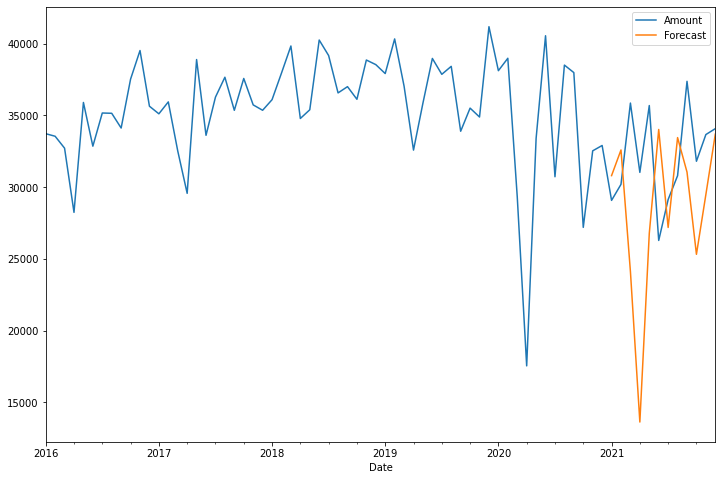

In [ ]:
series['Forecast'] = result.predict(start=60,end=72,dynamic=True)
series[["Amount","Forecast"]].plot(figsize=(12,8))

## forecast 2022

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates = [series.index[-1] + DateOffset(months=x) for x in range(0,12)]

In [ ]:
future_datest_series=pd.DataFrame(index=future_dates[1:],columns=series.columns)
future_datest_series.tail()

,Amount,population,Number of days in this month,Amount first Defferences,Seasonal first Defferences,Seasonal first Defferences 1,Forecast
2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_series=pd.concat([series,future_datest_series])

<AxesSubplot:>

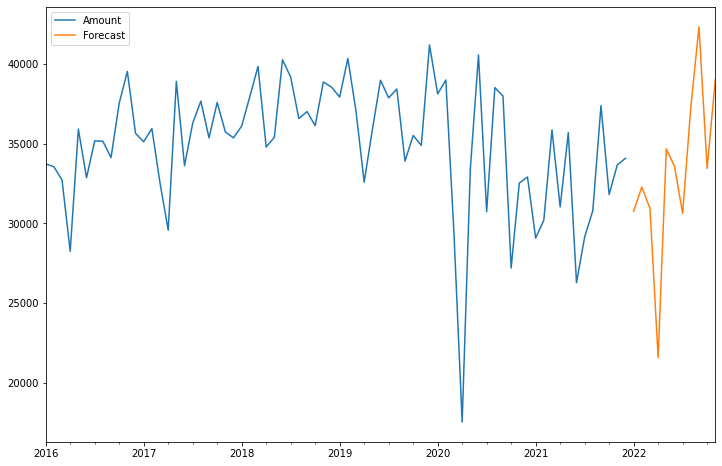

In [ ]:
future_series['Forecast'] = result.predict(start = 72, end = 84, dynamic= True)  
future_series[['Amount', 'Forecast']].plot(figsize=(12, 8)) 

In [ ]:
series['Forecast'].dropna()

Date
2021-01-01    30808.601353
2021-02-01    32597.287878
2021-03-01    24128.281886
2021-04-01    13635.926615
2021-05-01    26781.920552
2021-06-01    34024.699397
2021-07-01    27196.370036
2021-08-01    33459.065930
2021-09-01    31054.899068
2021-10-01    25324.639460
2021-11-01    29490.138653
2021-12-01    33698.223127
Name: Forecast, dtype: float64

In [ ]:
series['Amount'][60:]

Date
2021-01-01    29083
2021-02-01    30200
2021-03-01    35865
2021-04-01    31035
2021-05-01    35692
2021-06-01    26291
2021-07-01    29143
2021-08-01    30803
2021-09-01    37380
2021-10-01    31810
2021-11-01    33670
2021-12-01    34082
Name: Amount, dtype: int64

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(series['Amount'][60:], series['Forecast'].dropna()))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 7631.798


In [ ]:
actual = np.array(series['Amount'][60:])

predicted = np.array(series['Forecast'].dropna())
rmspe = np.sqrt(np.mean(np.square((actual - predicted) / actual))) * 100

print("RMSPE: {:.2f}%".format(rmspe))
accuracy = 100 - rmspe
print("Accuracy: {:.2f}%".format(accuracy))

RMSPE: 23.76%
Accuracy: 76.24%
